### Lowest Common Ancestor (LCA)

In [1]:
from PW_explorer.load_worlds import load_worlds
from PW_explorer.visualize import PWEVisualization
import pandas as pd

In [2]:
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
import networkx as nx

In [3]:
%load_ext PWE_NB_Extension

##### Database

In [4]:
%%clingo --donot-run --donot-display_input -lci parent_db

% schema par(Child, Parent)
%graphviz graph graph_type=directed rankdir=TD
%graphviz edge par(TAIL,HEAD) color=blue
par(albert,bernhard). 
par(albert,monique).
par(bernhard,hermann). 
par(bernhard,johanna).
par(eva,kati).
par(franz,rita). 
par(franz,wilhelm).  
par(heinz,rita). 
par(heinz,wilhelm).
par(hermann,rita).
par(hermann,wilhelm). 
par(karl,hermann). 
par(karl,johanna). 
par(kati,hermann).
par(kati,johanna). 

##### LCA Rules

In [5]:
%%clingo --donot-run --donot-display_input -lci lca_rules

anc(X,Y) :- par(X,Y).
anc(X,Y) :- par(X,Z), anc(Z,Y).

ca(X,A,A) :- anc(X,A).
ca(A,X,A) :- anc(X,A).
ca(X,Y,A) :- anc(X,A), anc(Y,A), X != Y.

not_lca(X,Y,A) :- ca(X,Y,A), ca(X,Y,A1), anc(A1,A).

lca(X,Y,A) :- ca(X,Y,A), not not_lca(X,Y,A).

In [6]:
%%clingo -l parent_db lca_rules --donot-display_input --save_meta_data_to md --saveto lca_out
#show par/2.
#show lca/3.

Output:


'Answer: 1\npar(albert,bernhard) par(albert,monique) par(bernhard,hermann) par(bernhard,johanna) par(eva,kati) par(franz,rita) par(franz,wilhelm) par(heinz,rita) par(heinz,wilhelm) par(hermann,rita) par(hermann,wilhelm) par(karl,hermann) par(karl,johanna) par(kati,hermann) par(kati,johanna) lca(albert,bernhard,bernhard) lca(albert,monique,monique) lca(bernhard,hermann,hermann) lca(bernhard,johanna,johanna) lca(eva,kati,kati) lca(franz,rita,rita) lca(franz,wilhelm,wilhelm) lca(heinz,rita,rita) lca(heinz,wilhelm,wilhelm) lca(hermann,rita,rita) lca(hermann,wilhelm,wilhelm) lca(karl,hermann,hermann) lca(karl,johanna,johanna) lca(kati,hermann,hermann) lca(kati,johanna,johanna) lca(eva,johanna,johanna) lca(eva,hermann,hermann) lca(bernhard,wilhelm,wilhelm) lca(karl,wilhelm,wilhelm) lca(kati,wilhelm,wilhelm) lca(bernhard,rita,rita) lca(karl,rita,rita) lca(kati,rita,rita) lca(albert,johanna,johanna) lca(albert,hermann,hermann) lca(eva,rita,rita) lca(albert,rita,rita) lca(eva,wilhelm,wilhelm) lca(albert,wilhelm,wilhelm) lca(bernhard,albert,bernhard) lca(monique,albert,monique) lca(hermann,bernhard,hermann) lca(johanna,bernhard,johanna) lca(kati,eva,kati) lca(rita,franz,rita) lca(wilhelm,franz,wilhelm) lca(rita,heinz,rita) lca(wilhelm,heinz,wilhelm) lca(rita,hermann,rita) lca(wilhelm,hermann,wilhelm) lca(hermann,karl,hermann) lca(johanna,karl,johanna) lca(hermann,kati,hermann) lca(johanna,kati,johanna) lca(johanna,eva,johanna) lca(hermann,eva,hermann) lca(wilhelm,bernhard,wilhelm) lca(wilhelm,karl,wilhelm) lca(wilhelm,kati,wilhelm) lca(rita,bernhard,rita) lca(rita,karl,rita) lca(rita,kati,rita) lca(johanna,albert,johanna) lca(hermann,albert,hermann) lca(rita,eva,rita) lca(rita,albert,rita) lca(wilhelm,eva,wilhelm) lca(wilhelm,albert,wilhelm) lca(karl,bernhard,hermann) lca(kati,bernhard,hermann) lca(eva,bernhard,hermann) lca(karl,bernhard,johanna) lca(kati,bernhard,johanna) lca(eva,bernhard,johanna) lca(heinz,franz,rita) lca(hermann,franz,rita) lca(bernhard,franz,rita) lca(karl,franz,rita) lca(kati,franz,rita) lca(eva,franz,rita) lca(albert,franz,rita) lca(heinz,franz,wilhelm) lca(hermann,franz,wilhelm) lca(bernhard,franz,wilhelm) lca(karl,franz,wilhelm) lca(kati,franz,wilhelm) lca(eva,franz,wilhelm) lca(albert,franz,wilhelm) lca(franz,heinz,rita) lca(hermann,heinz,rita) lca(bernhard,heinz,rita) lca(karl,heinz,rita) lca(kati,heinz,rita) lca(eva,heinz,rita) lca(albert,heinz,rita) lca(franz,heinz,wilhelm) lca(hermann,heinz,wilhelm) lca(bernhard,heinz,wilhelm) lca(karl,heinz,wilhelm) lca(kati,heinz,wilhelm) lca(eva,heinz,wilhelm) lca(albert,heinz,wilhelm) lca(franz,hermann,rita) lca(heinz,hermann,rita) lca(franz,hermann,wilhelm) lca(heinz,hermann,wilhelm) lca(bernhard,karl,hermann) lca(kati,karl,hermann) lca(eva,karl,hermann) lca(albert,karl,hermann) lca(bernhard,karl,johanna) lca(kati,karl,johanna) lca(eva,karl,johanna) lca(albert,karl,johanna) lca(bernhard,kati,hermann) lca(karl,kati,hermann) lca(albert,kati,hermann) lca(bernhard,kati,johanna) lca(karl,kati,johanna) lca(albert,kati,johanna) lca(bernhard,eva,johanna) lca(karl,eva,johanna) lca(albert,eva,johanna) lca(bernhard,eva,hermann) lca(karl,eva,hermann) lca(albert,eva,hermann) lca(franz,bernhard,wilhelm) lca(heinz,bernhard,wilhelm) lca(franz,karl,wilhelm) lca(heinz,karl,wilhelm) lca(franz,kati,wilhelm) lca(heinz,kati,wilhelm) lca(franz,bernhard,rita) lca(heinz,bernhard,rita) lca(franz,karl,rita) lca(heinz,karl,rita) lca(franz,kati,rita) lca(heinz,kati,rita) lca(karl,albert,johanna) lca(kati,albert,johanna) lca(eva,albert,johanna) lca(karl,albert,hermann) lca(kati,albert,hermann) lca(eva,albert,hermann) lca(franz,eva,rita) lca(heinz,eva,rita) lca(franz,albert,rita) lca(heinz,albert,rita) lca(franz,eva,wilhelm) lca(heinz,eva,wilhelm) lca(franz,albert,wilhelm) lca(heinz,albert,wilhelm)\nSATISFIABLE\n\nModels       : 1\nCalls        : 1\nTime         : 0.002s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.002s'

In [7]:
pw_rel_dfs, schemas, pw_objs = load_worlds(lca_out, md, print_parse_tree=False, reasoner='clingo')

Number of Models: 1


In [8]:
lca_df = pw_rel_dfs['lca_3']

Visualizing the full Database

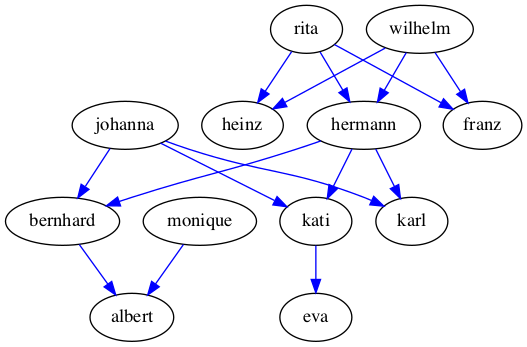

In [9]:
g = PWEVisualization.graphviz_from_meta_data(pw_rel_dfs, md['graphviz'])
draw(g)

Highlighting LCAs of specific nodes

In [10]:
def get_lcas(lca_df, n1, n2):
    ca_n1_n2 = list(lca_df[(lca_df['x1'] == n1) & (lca_df['x2'] == n2)]['x3'])
    return ca_n1_n2

In [11]:
def lca_highlighter(g, n1, n2, ca_n1_n2:list):
    g2 = g.copy()
    for n in g2.nodes:
        g2.nodes[n]['color'] = 'gray'
        g2.nodes[n]['fontcolor'] = 'gray'
    for e in g2.edges:
        g2.edges[e]['color'] = 'gray'
    for n in [n1,n2]:
        for ca in ca_n1_n2:
            path = nx.shortest_path(g2, ca, n)
            for p1, p2 in list(zip(path, path[1:])):
                g2.edges[(p1,p2)]['color'] = 'blue'
            for p in path:
                g2.nodes[p]['color'] = 'turquoise'
                g2.nodes[p]['style'] = 'dashed'
    for n in [n1,n2]:
        g2.nodes[n]['color'] = 'red'
        g2.nodes[n]['fontcolor'] = 'black'
        g2.nodes[n]['style'] = 'solid'
    for n in ca_n1_n2:
        g2.nodes[n]['color'] = 'green'
        g2.nodes[n]['fontcolor'] = 'black'
        g2.nodes[n]['style'] = 'solid'
    return g2

Select the nodes

In [12]:
n1 = 'albert'
n2 = 'eva'

In [13]:
ca_n1_n2 = get_lcas(lca_df, n1, n2)
ca_n1_n2

['johanna', 'hermann']

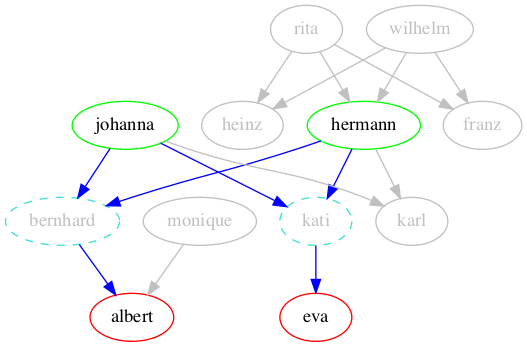

In [14]:
g2 = lca_highlighter(g, n1, n2, ca_n1_n2)
draw(g2)